https://movie.douban.com/subject/4920389/comments?start=0
https://movie.douban.com/subject/4920389/comments?start=20
https://movie.douban.com/subject/4920389/comments?start=40


D:\Anacoda3\lib\site-packages\ipykernel_launcher.py:76: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version


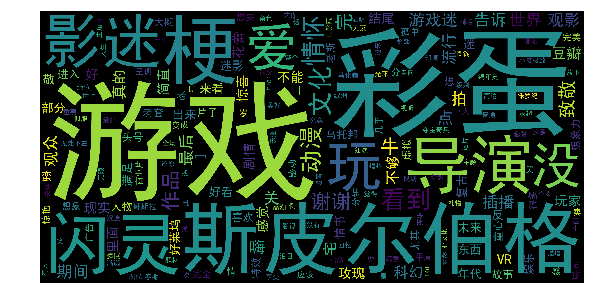

In [32]:
import jieba    #分词包
import numpy    #numpy计算包
import requests
import re
import pandas as pd  
import matplotlib.pyplot as plt
from urllib import request
from bs4 import BeautifulSoup as bs
%matplotlib inline 
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)
from wordcloud import WordCloud#词云包


from bs4 import BeautifulSoup
def get_HTML(url):
    try:
        r=requests.get(url,timeout=30)
        r.raise_for_status()
        r.encoding=r.apparent_encoding
        return r.text
    except:
        return ''
def parser(html):
    soup=BeautifulSoup(html,'html.parser')
    nowplaying=soup.find_all('div',id='nowplaying')
    nowplaying_movie_list=nowplaying[0].find_all('li',class_='list-item')
    nowplaying_list=list()
    for item in nowplaying_movie_list:
        nowplaying_dict=dict()
        nowplaying_dict['id']=item['id']
        nowplaying_dict['name']=item['data-title']
        nowplaying_list.append(nowplaying_dict)
    return nowplaying_list
def get_comments(id,num):
    each_comment=[]
    if(num>0):
        page=(num-1)*20
    else:
        return False
    url='https://movie.douban.com/subject/'+str(id)+'/comments?start='+str(page)
    print(url)
    html=get_HTML(url)
    soup=BeautifulSoup(html,'html.parser')
    comment_list=soup.find_all('div',class_='comment')
    for item in comment_list:
        each_comment.append(item.find_all('p',class_="")[0].string)
    return each_comment

 
def main():
    urll='https://movie.douban.com/cinema/nowplaying/beijing/'
    htmll=get_HTML(urll)
    listt=parser(htmll)
    comment=list()
    comment_tmp=list()
    for i in range(3):
        i+=1
        comment_tmp=get_comments(listt[0]['id'],i)
        comment.append(comment_tmp)
    comm=''
    for com in comment:
        comm+=(((str(com)).strip()))
    comm
    r="[\s+\.\!\/_,$%^*(+\"\']+|[+——！，。？、~@#￥%……&*（）\\n]+"
    cleaned_comments=re.sub(r,'', comm)
    #使用结巴分词进行中文分词
    segment = jieba.lcut(cleaned_comments)
    words_df=pd.DataFrame({'segment':segment})
 
    #去掉停用词
    stopwords=pd.read_csv("stopwords.txt",index_col=False,quoting=3,sep="\t",names=['stopword'], encoding='utf-8')#quoting=3全不引用
    words_df=words_df[~words_df.segment.isin(stopwords.stopword)]
 
    #统计词频
    words_stat=words_df.groupby(by=['segment'])['segment'].agg({"计数":numpy.size})
    words_stat=words_stat.reset_index().sort_values(by=["计数"],ascending=False)
 
    #用词云进行显示
    wordcloud=WordCloud(font_path="simhei.ttf",background_color="black",max_font_size=100,scale=8)
    word_frequence = {x[0]:x[1] for x in words_stat.head(1000).values}
 
    word_frequence_list = []
    for key in word_frequence:
        temp = (key,word_frequence[key])
        word_frequence_list.append(temp)
 

    wordcloud=wordcloud.fit_words(dict((word_frequence_list)))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("predict_result.jpg")
    plt.show()
#主函数
main()


